# lab2 - Set Covering with Evolutionary Algorithms

In [1]:
import logging
import random
from matplotlib import pyplot as plt
from tqdm import tqdm   # pip install "git+https://github.com/tqdm/tqdm.git@devel#egg=tqdm"

from Gene import create_dict_genes
from Individual import Individual
from Genome import Genome

In [2]:
def problem(N, seed=None):
  random.seed(seed)
  return [
    list(set(random.randint(0, N-1) for n in range(random.randint(N//5, N//2))))
    for n in range(random.randint(N, N*5))
  ]

### Global functionalities and parameters

In [3]:
POPULATION_SIZE = 5
OFFSPRING_SIZE = 3
NUM_GENERATIONS = 1000

In [4]:
def tournament(population):
  x, y = tuple(random.choices(population, k=2))
  return x.fight(y)

In [5]:
def initial_population(id_to_genes):
  population = list()
  genes = list(id_to_genes.values())
  tot_genes = len(id_to_genes)

  for i in range(POPULATION_SIZE):
    genes = random.choices(genes, k=random.randint(1, N))
    population.append(Individual(Genome(genes), N))

  return population

In [6]:
def plot_gen_best(fitness_log):
  gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(NUM_GENERATIONS)]

  plt.figure(figsize=(15, 6))
  plt.ylabel("cost")
  plt.xlabel("generations")
  #plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".", label='fitness_log')
  plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)], label='gen_best')
  plt.legend()

## Evolution

In [7]:
def genetic_algorithm(population, id_to_genes, N):
  fitness_log = [(0, i.cost) for i in population]

  for g in tqdm(range(NUM_GENERATIONS)):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
      p1 = tournament(population)
      p2 = tournament(population)
      o = p1.reproduce(p2, id_to_genes, N)

      if random.random() < 0.3:
        o = o.mutate(id_to_genes, N)
        
      fitness_log.append((g+1, o.cost))
      offspring.append(o)
    population += offspring
    population = sorted(population, key=lambda i: i.cost)[:POPULATION_SIZE]

  winner = max(population, key=lambda i: i.cost)
  return winner, fitness_log

## Main

In [8]:
logging.getLogger().setLevel(logging.INFO)

### N = 5

100%|██████████| 1000/1000 [00:00<00:00, 1578.19it/s]
INFO:root:Genetic Algorithm (N=5):
	success=100.0%
	fitness=12
	covered={0, 1, 2, 3, 4};


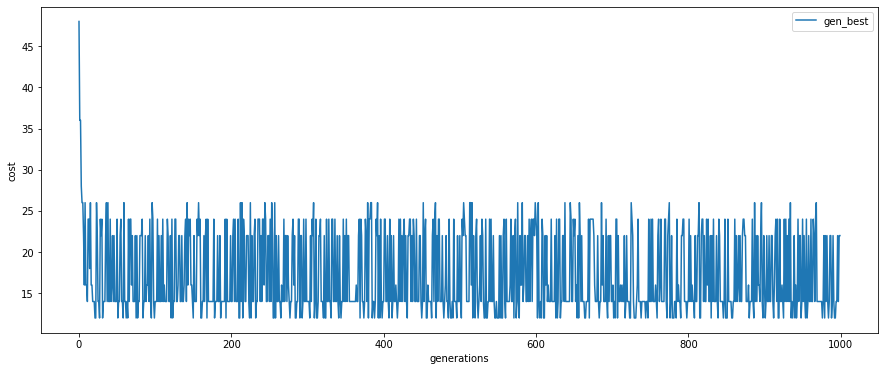

In [9]:
N = 5


id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")

plot_gen_best(fitness_log_GA)

### N=10

100%|██████████| 1000/1000 [00:00<00:00, 1884.34it/s]
INFO:root:Genetic Algorithm (N=10):
	success=100.0%
	fitness=26
	covered={0, 1, 2, 3, 4, 5, 6, 7, 8, 9};


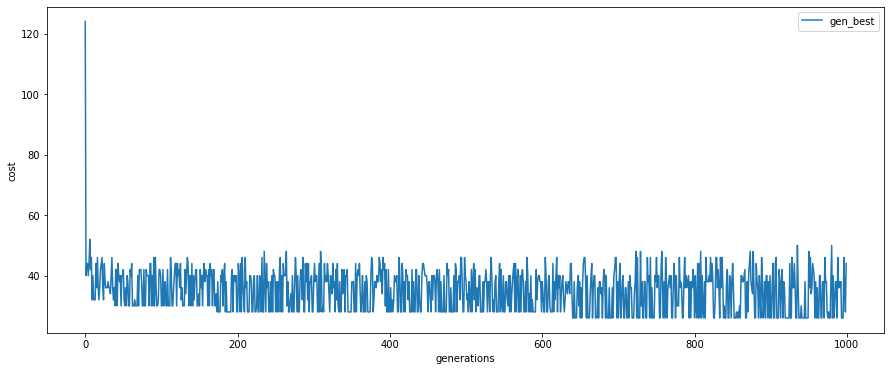

In [10]:
N = 10

id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")
plot_gen_best(fitness_log_GA)

### N=20

100%|██████████| 1000/1000 [00:00<00:00, 3535.61it/s]
INFO:root:Genetic Algorithm (N=20):
	success=100.0%
	fitness=48
	covered={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19};


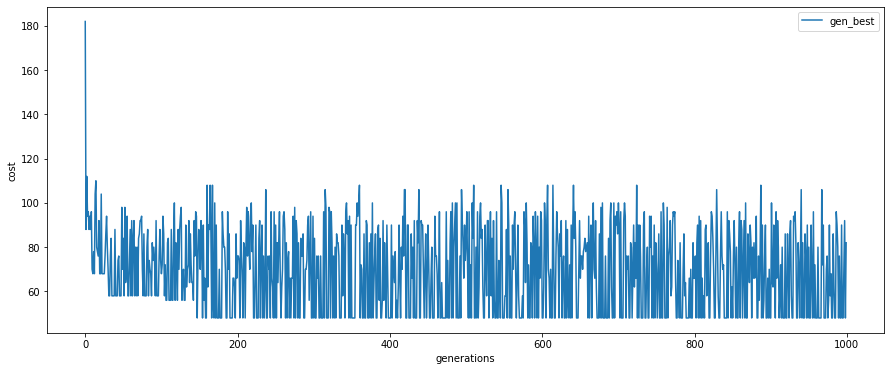

In [11]:
N = 20

id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")
plot_gen_best(fitness_log_GA)

### N=100

100%|██████████| 1000/1000 [00:01<00:00, 759.16it/s]
INFO:root:Genetic Algorithm (N=100):
	success=100.0%
	fitness=526
	covered={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99};


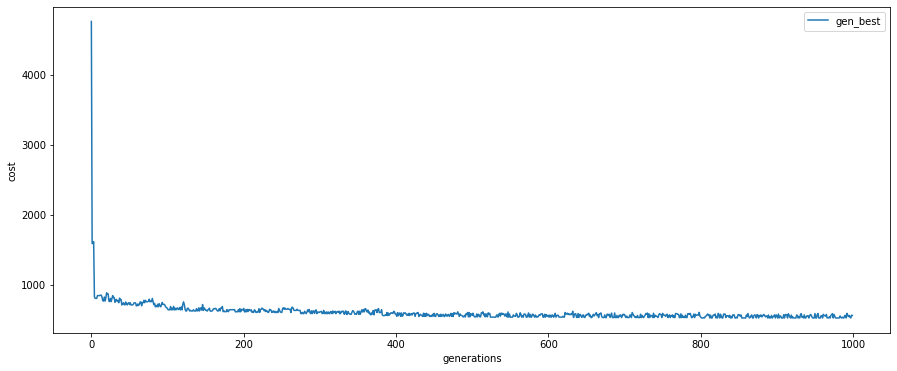

In [12]:
N = 100

id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")
plot_gen_best(fitness_log_GA)

### N=500

100%|██████████| 1000/1000 [02:12<00:00,  7.56it/s]
INFO:root:Genetic Algorithm (N=500):
	success=100.0%
	fitness=23230
	covered={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 

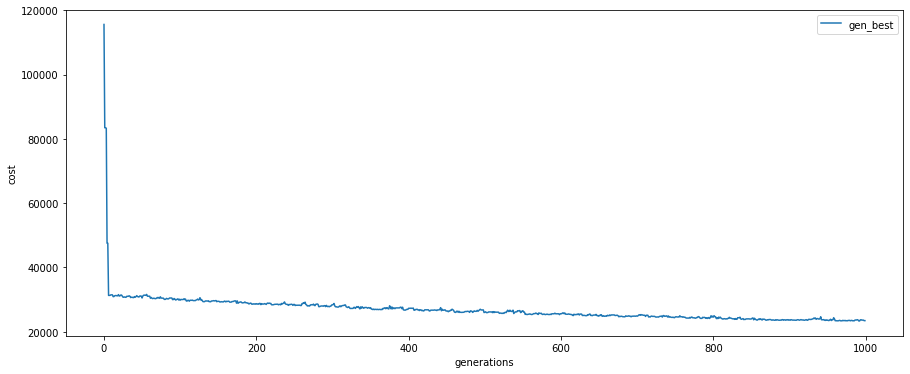

In [13]:
N = 500

id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")
plot_gen_best(fitness_log_GA)

### N=1000

100%|██████████| 1000/1000 [04:17<00:00,  3.89it/s]
INFO:root:Genetic Algorithm (N=1000):
	success=100.0%
	fitness=48880
	covered={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,

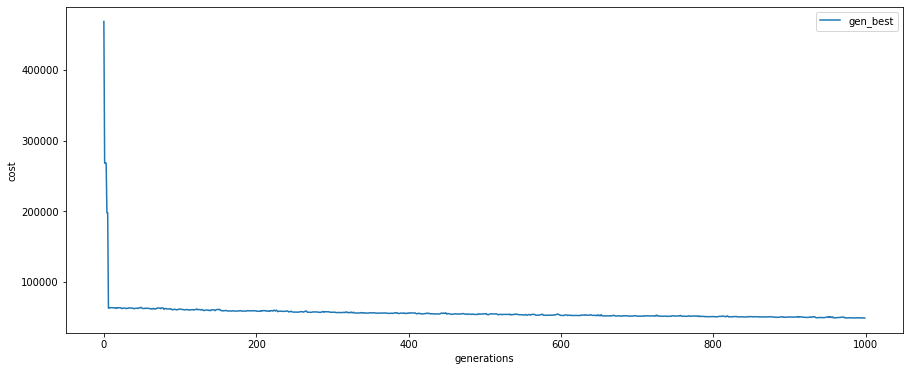

In [14]:
N = 1000

id_to_genes = create_dict_genes(problem(N, 42)) # Dictionaries to map genes to ids and vice versa
population = initial_population(id_to_genes)
winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes, N)

logging.info(f"Genetic Algorithm (N={N}):\n\tsuccess={len(winner_GA.covered)*100/N}%\n\tfitness={winner_GA.cost}\n\tcovered={winner_GA.covered};")
plot_gen_best(fitness_log_GA)